<a href="https://colab.research.google.com/github/vpaula07/NewYorkCityAirbnb/blob/main/NewYorkCityAirbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import folium
import plotly.express as px
from matplotlib import pyplot as plt


data = pd.read_csv('/content/AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Calcular a média de todos os valores de aluguel da cidade de Nova York.


In [4]:
preco_aluguel = data.loc[:, 'price']

np.mean(preco_aluguel)

152.7206871868289

## Contar todos os nomes distintos que aparecem na coluna região.


In [5]:
regiao = data.loc[:, 'neighbourhood_group']

pd.unique( regiao)

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

## Encontrar o valor máximo da coluna que contém os valores dos aluguéis.


In [7]:
preco_aluguel = data.loc[:, 'price']

np.max( preco_aluguel)

10000

# Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?


In [8]:
room_type = data.loc[:, 'room_type']

# mostrar os valores únicos
room_type_unique = np.unique(room_type)

print('As categorias de imóveis são: ')
print( room_type_unique)

As categorias de imóveis são: 
['Entire home/apt' 'Private room' 'Shared room']


# Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?#

In [9]:
host_id = data.loc[:, 'host_id']

host_id_unique = np.unique(host_id)

len(host_id_unique)

37457

# Como é a variação do preços dos imóveis em NY?


In [10]:
# Calcular o desvio padrão em torno da média de preços dos imóveis.

price = data.loc[: , 'price']

print('A media: {:.2f}'.format(np.mean( price )))
print('O STD: {:.2f}'.format(np.std(price)))

A media: 152.72
O STD: 240.15


# Existem mais imóveis baratos ou caros?

Existem mais de 20.000 imóveis com valor de aluguel de até U$ 1.100,00


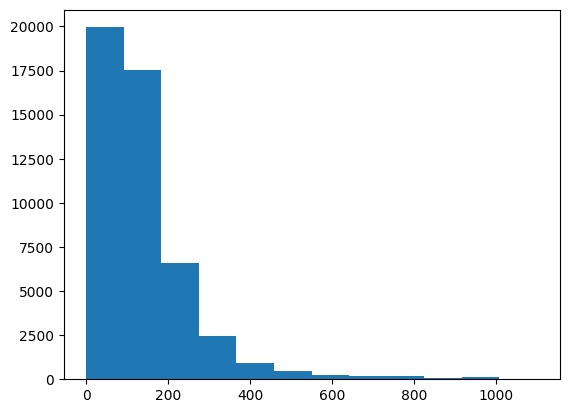

In [11]:
# selecionar a coluna price e filtrar linhas

linhas = data.loc[:, 'price'] < 1100
price = data.loc[linhas, 'price']

plt.hist(price, bins=12);

print('Existem mais de 20.000 imóveis com valor de aluguel de até U$ 1.100,00')


# Qual a distribuição do número de Reviews? Existem imóveis com muitos e outro com poucos reviews?


Existem quase 30.000 imóveis com até 10 avaliações.


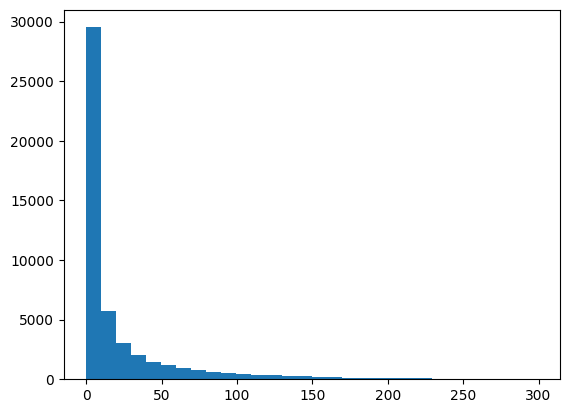

In [12]:
linhas = data.loc[:, 'number_of_reviews'] < 300
number_of_reviews = data.loc[linhas, 'number_of_reviews']

plt.hist(number_of_reviews, bins=30);

print('Existem quase 30.000 imóveis com até 10 avaliações.')

## Quantidade de proprietários por região.

In [13]:
# aplicação de uma operação matemárica
( data.loc[:, ['host_id', 'neighbourhood_group']]
    .groupby( ['neighbourhood_group'] )
    .nunique() )

,host_id
neighbourhood_group,
Bronx,789
Brooklyn,15966
Manhattan,16578
Queens,3983
Staten Island,256


## Preço médio do aluguel por região

In [14]:
colunas = ['price', 'neighbourhood_group']
colunas_groupby = ['neighbourhood_group']

data.loc[:, colunas].groupby(['neighbourhood_group']).mean()

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


## Número de avaliações média por tipo de quarto

In [15]:
colunas = ['number_of_reviews', 'room_type']
colunas_groupby = ['room_type']

data.loc[:, colunas].groupby(colunas_groupby).mean()

,number_of_reviews
room_type,
Entire home/apt,22.842418
Private room,24.112962
Shared room,16.600000


## # Desvio padrão do preço do alguel por região e tipo de quarto

In [54]:
colunas = ['price', 'neighbourhood_group', 'room_type']
colunas_groupby = ['neighbourhood_group', 'room_type']

data.loc[:, colunas].groupby(colunas_groupby).std()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt   95.027102
                    Private room     107.009071
                    Shared room      101.798871
Brooklyn            Entire home/apt  226.415825
                    Private room     124.713499
                    Shared room       53.444485
Manhattan           Entire home/apt  331.830132
                    Private room     190.191318
                    Shared room       92.416534
Queens              Entire home/apt  129.383208
                    Private room     180.506756
                    Shared room      171.000607
Staten Island       Entire home/apt  394.600216
                    Private room      36.138245
                    Shared room       45.119594

## Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?

In [24]:
colunas = ['price', 'neighbourhood_group']
colunas_groupby = ['neighbourhood_group']

data_plot = data.loc[:, colunas].groupby(colunas_groupby).max().reset_index()

In [25]:
px.bar(data_plot, x='neighbourhood_group', y= 'price')

##  Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro, na cidade de Nova York?

In [50]:
colunas = ['price', 'neighbourhood_group', 'latitude', 'longitude']
colunas_groupby = ['neighbourhood_group']

data_plot = data.loc[:, colunas].groupby(colunas_groupby).max().reset_index()

In [51]:
f = folium.Figure( width=1024, height=768)

map = folium.Map(
    location = [data_plot['latitude'].mean(),
                data_plot['longitude'].mean()],
    zoom_start=14,
    control_scale= True
)

for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
                location_info['longitude']],
                popup=location_info['neighbourhood_group']).add_to(map)

map

## Conseguimos saber onde estão localizados os imóveis pelo seu tipo?

In [52]:
# Selecionando linhas aleatoriamente e colunas
colunas = ['neighbourhood_group', 'room_type', 'latitude', 'longitude']
data_plot = data.loc[:, colunas].sample(100)

# Criando uma nova coluna color
data_plot.loc[:, 'color'] = 'NA'

# Selecionando as linhas do segmento
linhas_private_room = data_plot.loc[:, 'room_type'] == 'Private room'
linhas_entire_apt = data_plot.loc[:, 'room_type'] == 'Entire home/apt'
linhas_shared_room = data_plot.loc[:, 'room_type'] == 'Shared room'

# Colocando as cores para cada segmento
data_plot.loc[linhas_private_room, 'color'] = 'darkgreen'
data_plot.loc[linhas_entire_apt, 'color'] = 'darkred'
data_plot.loc[linhas_shared_room, 'color'] = 'purple'

# Criando a área do mapa
map = folium.Map()

# Adicionando os pins nos mapas
for index, location_info in data_plot.iterrows():
  folium.Marker(
      [location_info['latitude'], location_info['longitude']],
       popup=location_info[['neighbourhood_group', 'room_type']],
       icon=folium.Icon(color = location_info['color'])
  ).add_to( map )

# Exibindo o mapa
map